In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations

import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
import pickle # to serialize/deserialize objects
import math # for sqrt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential, load_model
from functools import partial


from statistics import mean
## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression # In the course library

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

!pip install category_encoders
import category_encoders as ce



import pickle # To save the model
from functools import partial
import random



# The following is to be able to mount Google Drive
from google.colab import drive


# We import a function I prepared for you in the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat


from typing import List

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger


# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot
from livelossplot import PlotLossesKerasTF


import os
from os.path import isfile
##
from pandas.plotting import scatter_matrix
from scipy.io.arff import loadarff
from google.colab import drive
import glob

#dfArffDataA1 = []
#dfArffDataA2 = []
#dfArffDataB = []
dfArffDataAll = []

mount_point = '/content/drive' # Always the same, don't change it
drive.mount(mount_point)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it

# Replace the following folder with some folder inside your google drive
my_path = drive_path + \
  'CSN/ML_for_network/'

--2023-11-09 06:20:50--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-11-09 06:20:50 (42.7 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-11-09 06:20:50--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected

# **A1 Training**

## **Load A1**

In [ ]:
## Add A1 Data
dfArffDataAll = []
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/'
StrArffFile = os.listdir(sPath)

i = 0
dfArffDataAll = pd.DataFrame()
while i < len(StrArffFile):
  str = sPath + StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1
dfArffDataAll.head(n = 1000)

#df.info(verbose=True)
#df.shape


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-15s-VPN.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-30s-VPN.arff


<ipython-input-183-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-183-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-120s-VPN.arff


<ipython-input-183-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-60s-VPN.arff


<ipython-input-183-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1,std_fiat,std_biat
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN',NaN,NaN
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN',NaN,NaN
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN',NaN,NaN
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN',NaN,NaN
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
996,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
997,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
998,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN


In [ ]:
dfArffDataAll.head(n = 1000)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1,std_fiat,std_biat
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN,0.0,0.0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN,0.0,0.0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN,0.0,0.0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN,0.0,0.0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1166.0,143.0,960.0,400.0,960.0,271.500000,960.000000,181.723691,0.000000,4288.164666,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,Non-VPN,0.0,0.0
1045,1368882.0,12.0,40.0,461462.0,360632.0,6549.674641,10904.347107,46664.322581,52300.726229,242.533688,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,Non-VPN,0.0,0.0
1046,1050.0,140.0,897.0,337.0,897.0,238.500000,897.000000,139.296446,0.000000,4761.904762,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,Non-VPN,0.0,0.0
1047,1101.0,146.0,916.0,374.0,916.0,260.000000,916.000000,161.217245,0.000000,4541.326067,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,Non-VPN,0.0,0.0


<Axes: >

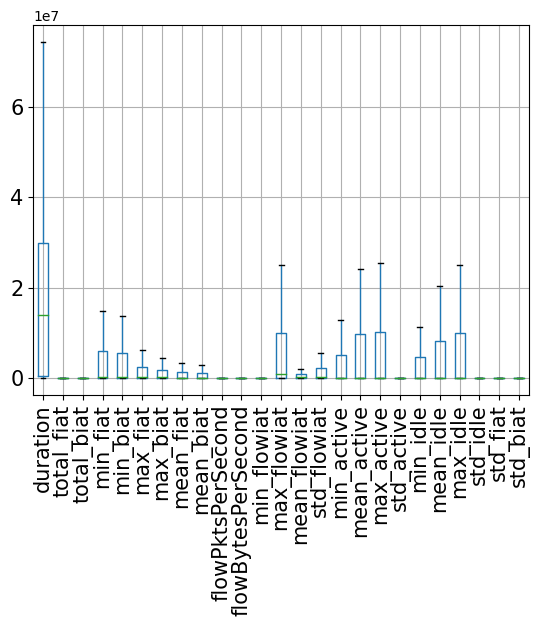

In [ ]:
dfArffDataAll.boxplot(rot=90, fontsize=15,showfliers=False)

In [ ]:
dfArffDataAll.shape

(59706, 26)

In [ ]:
dfArffDataAll.describe()

## **Load B**

In [ ]:
## Add B Data
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/'
StrArffFile = os.listdir(sPath)
i = 0
while i < len(StrArffFile):
  #if 'TimeBasedFeatures-Dataset-60s.arff' == StrArffFile[i] or "TimeBasedFeatures-Dataset-60s-AllinOne.arff" == StrArffFile[i]:
  #  StrArffFile.pop(i)
  #  continue
  StrArffFile[i] = sPath + StrArffFile[i]
  i = i + 1

i = 0
while i < len(StrArffFile):
  str = StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1

#df.head(n = 5)
#df.info(verbose=True)

## **A1 Preprocessing**

### **Remove NAN & byte string to string**

In [ ]:
#remove nan
dfArffDataAll = dfArffDataAll.fillna(0)
#transfer byte arrays to string class
ser = pd.Series(dfArffDataAll['class1']).str.decode('ascii')
dfArffDataAll['class1'] = pd.DataFrame(ser)
#print current class type
dfArffDataAll.columns[dfArffDataAll.isnull().any()].tolist()
class1 =dfArffDataAll['class1'].unique()
print ("Values of class: ",  class1 )
#dfArffDataAll.replace(np.nan,0)

Values of class:  ['Non-VPN' 'VPN']


### **Remove -1**

In [ ]:
#Transform from -1 to zerod
from collections import Counter
handleFeatures = []
def findMinus1Feature(dfArffDataAll,handleFeatures):
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    #print(column," has ",c[-1],"-1 values")
    if c[-1] > 0:
      handleFeatures.append(column)
    c = []

def printMinus1Feature(dfArffDataAll):
  handleFeatures = []
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    if c[-1] > 0:
      print(column," has ",c[-1],"-1 values")
      handleFeatures.append(column)
    c = []
  print("-1 Handle Features",handleFeatures)


In [ ]:
printMinus1Feature(dfArffDataAll)
findMinus1Feature(dfArffDataAll,handleFeatures)

print("Handle Features to transform -1 to zero",handleFeatures)

for featureName in handleFeatures:
  dfArffDataAll.loc[dfArffDataAll[featureName] == -1, featureName] = 0

print("After Handle:")
printMinus1Feature(dfArffDataAll)

total_fiat  has  6445 -1 values
total_biat  has  9715 -1 values
min_fiat  has  8846 -1 values
min_biat  has  13857 -1 values
max_fiat  has  2401 -1 values
max_biat  has  4142 -1 values
min_flowiat  has  2289 -1 values
max_flowiat  has  2108 -1 values
min_active  has  32228 -1 values
max_active  has  32228 -1 values
min_idle  has  32228 -1 values
max_idle  has  32228 -1 values
-1 Handle Features ['total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
Handle Features to transform -1 to zero ['total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
After Handle:
-1 Handle Features []


In [ ]:
column= "duration"
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")
dfArffDataAll.drop(dfArffDataAll[dfArffDataAll.duration == 0].index, inplace=True)
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")

duration  has  2110  0 values
duration  has  0  0 values


### **Generat Trainning Data**

In [ ]:
for columnName in dfArffDataAll:
  dfArffDataAll[columnName] = dfArffDataAll[columnName]

In [ ]:
from imblearn.over_sampling import SMOTE
categorical_columns = ['class1']
remove_feature = [ 'class1']

numerical_columns = list(dfArffDataAll.columns.values)
for name in (remove_feature):
  try:
    numerical_columns.remove(name)
  except:
    print('No '+ name + 'in feature list')
print(numerical_columns)

from sklearn.model_selection import train_test_split
X = dfArffDataAll.drop(columns=remove_feature)
y = dfArffDataAll['class1']
X_train, X_test, y_train, y_test = train_test_split(
    dfArffDataAll.drop(columns=remove_feature), dfArffDataAll['class1'], random_state=42)

print( "Samples per class before: ", Counter(y_train) )
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print( "Samples per class after: ", Counter(y_train) )

encoder = []
encoder = OneHotEncoder(sparse_output=False)
#encoder = ce.OneHotEncoder(cols=['class1'], use_cat_names=True)
df_encode = encoder.fit_transform(pd.DataFrame(y))
y_train = encoder.fit_transform(pd.DataFrame(y_train))
y_test = encoder.fit_transform(pd.DataFrame(y_test))

y_train = y_train[:,0]
y_test = y_test[:,0]

print("Encode in name:%s \n out:%s" %(encoder.feature_names_in_, encoder.get_feature_names_out()))


['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'std_fiat', 'std_biat']
Samples per class before:  Counter({'VPN': 21608, 'Non-VPN': 21589})
Samples per class after:  Counter({'Non-VPN': 21608, 'VPN': 21608})
Encode in name:['class1'] 
 out:['class1_Non-VPN' 'class1_VPN']


In [ ]:
list(dfArffDataAll.columns.values)

## **A1 Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean = False))
])

from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns)])

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100,
                      criterion='gini',
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto', # auto means=sqrt(n_features)
                      min_weight_fraction_leaf=0.0,
                      )

rf = Pipeline([ ('preprocess', preprocessing),
              ('RandForest', model) ])

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', max_leaf_nodes=16, n_jobs=-1,
                       random_state=5)

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['duration', 'total_fiat',
                                                   'total_biat', 'min_fiat',
                                                   'min_biat', 'max_fiat',
                                                   'max_biat', 'mean_fiat',
                                                   'mean_biat',
                                                   'flowPktsPerSecond',
                                                   'flowBytesPerSecond',
                                                   'min_flowiat', 'max_flowiat',
                                                   'mean_flowiat',
                                                   'std_flowiat', 'min_active',
                                                   'mean_active', 'max_active',
                                                   'std_active', 'min_idle',
                                                   'mean_idle', 'max_idle',
                                                   'std_idle', 'std_fiat',
                                                   'std_biat'])])),
                ('RandForest',
                 RandomForestClassifier(max_features='auto', max_leaf_nodes=16,
                                        n_jobs=-1, random_state=5))])

In [ ]:
import pickle # To save the model
with open(my_path+"RandomForest_A1_v1.pkl", "wb") as dump_file:
  pickle.dump(rf, dump_file)

Normalized confusion matrix
[[0.79170102 0.20829898]
 [0.28928521 0.71071479]]
0.7516494200986179


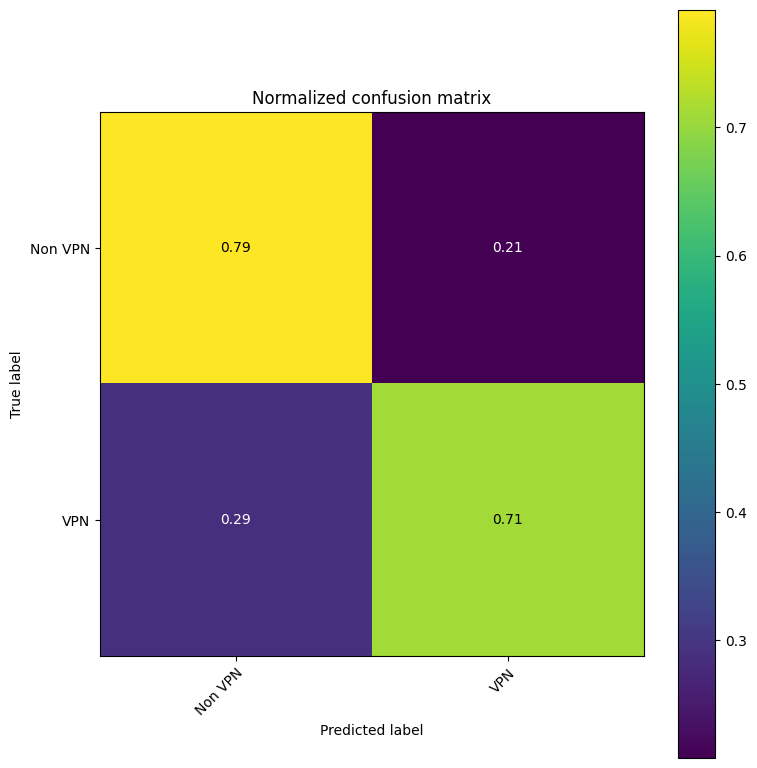

In [ ]:
y_pred = rf.predict(X_test)

y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)
print(accuracy_score(y_pred, y_test))

Normalized confusion matrix
[[0.80874389 0.19125611]
 [0.31049483 0.68950517]]
0.749983251825551


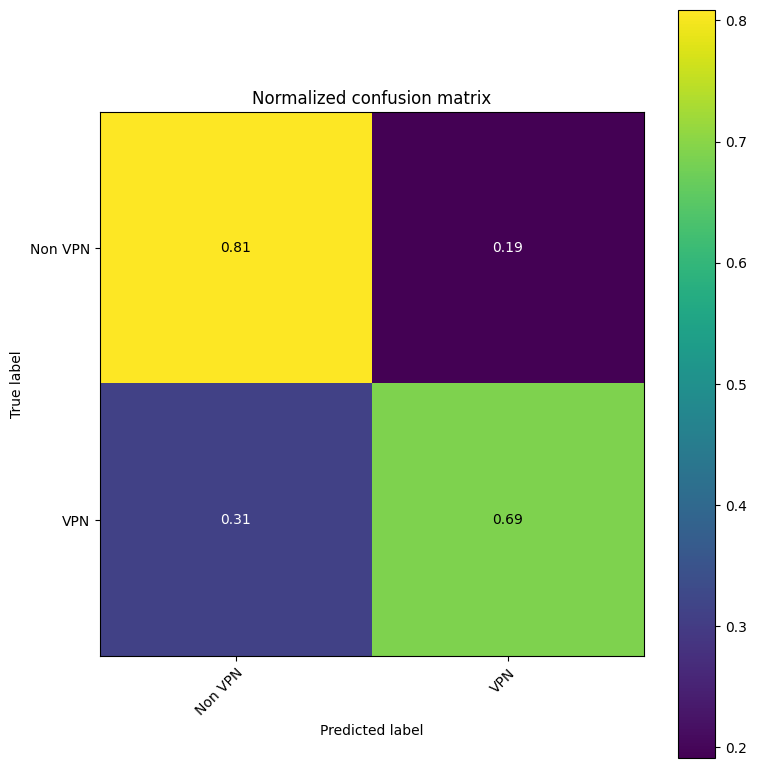

In [ ]:
#y_pred = rf.predict(X_test)
y_pred = model.predict(X_test)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)
print(accuracy_score(y_pred, y_test))

--2023-11-08 21:41:58--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.5’

visualization.py.5  100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-11-08 21:41:59 (116 MB/s) - ‘visualization.py.5’ saved [13023/13023]



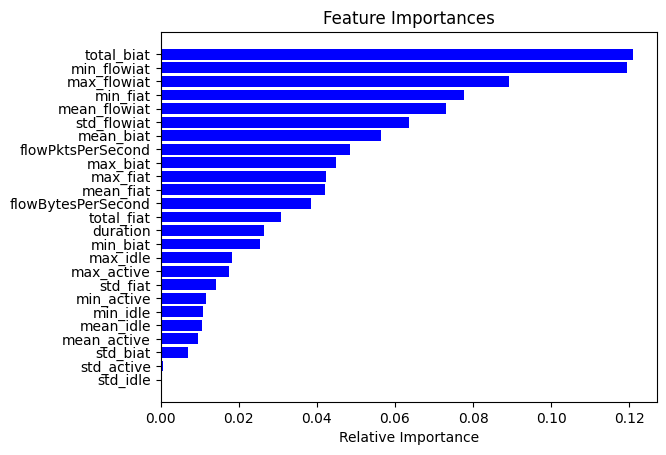

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'std_fiat',
       'std_biat'],
      dtype='object')

In [ ]:
# Import the visualization library I prepared for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat, plot_feature_importances
feature_names = X_test.columns
plot_feature_importances(rf['RandForest'].feature_importances_, feature_names)
feature_names

In [ ]:
rf['RandForest'].feature_importances_

array([0.02308158, 0.04877076, 0.1292345 , 0.06155693, 0.0351496 ,
       0.03750823, 0.04793303, 0.05209509, 0.05884241, 0.06396804,
       0.03821678, 0.10111171, 0.09014222, 0.06450028, 0.06040617,
       0.00790463, 0.01108734, 0.01297406, 0.00144205, 0.01075867,
       0.01404336, 0.02848647, 0.00078606])

## **A1 Random Forest -- Get the most N importance parameters**

In [ ]:
importances = list(zip(rf['RandForest'].feature_importances_, feature_names))
importances.sort(reverse=True)
print(importances)
print(importances[1])
NumOfImportPara = len(feature_names)
BestColumns = list()
i= 0
for i in range(0, NumOfImportPara):
  BestColumns.append(importances[i][1])
print(BestColumns)
numerical_columns = BestColumns
FilterColumn = BestColumns
FeatureSelector = ColumnTransformer([("filter", "passthrough", FilterColumn)], remainder="drop")

rf2 = Pipeline([ ('selector', FeatureSelector),
          ('preprocess', preprocessing),
          ('RandForest', model) ])
rf2.fit(X_train, y_train)

[(0.11609340399352597, 'min_flowiat'), (0.10698512196164872, 'total_biat'), (0.0880142902006193, 'max_flowiat'), (0.07346157609989679, 'min_fiat'), (0.06019161928350863, 'flowPktsPerSecond'), (0.057369759629026844, 'mean_biat'), (0.05433596210700105, 'max_biat'), (0.05187342751254985, 'std_flowiat'), (0.04713248346221086, 'mean_flowiat'), (0.04617418887541824, 'flowBytesPerSecond'), (0.044906768545746205, 'max_fiat'), (0.042877148534349464, 'mean_fiat'), (0.040430484226631334, 'total_fiat'), (0.0349762234256831, 'duration'), (0.030968542534666958, 'min_biat'), (0.016307830874025826, 'max_active'), (0.013906745418262105, 'mean_idle'), (0.013827421717999113, 'max_idle'), (0.013743322115300997, 'mean_active'), (0.013458217450124871, 'min_idle'), (0.012706878860575845, 'std_fiat'), (0.010994672371892715, 'min_active'), (0.00799504015139102, 'std_biat'), (0.0007823968025821249, 'std_idle'), (0.00048647384536215795, 'std_active')]
(0.10698512196164872, 'total_biat')
['min_flowiat', 'total_bi

ValueError: ignored

In [ ]:
y_pred = rf2.predict(X_test)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
feature_names = X_test.columns
plot_feature_importances(rf['RandForest'].feature_importances_, feature_names)

In [ ]:
importances = list(zip(rf['RandForest'].feature_importances_, feature_names))
importances.sort(reverse=True)
importances = np.array(importances)
importances = importances[:,1]
importances = importances[range(0, 10)]

print(importances)

X_train_filter = X_train[importances]
X_test_filter = X_test[importances]


categorical_columns = ['class1']
numerical_columns_filter = importances
print(numerical_columns_filter)



#X_train[importances[1:10]]

['total_biat' 'min_flowiat' 'max_flowiat' 'min_fiat' 'mean_flowiat'
 'std_flowiat' 'mean_biat' 'flowPktsPerSecond' 'max_biat' 'max_fiat']
['total_biat' 'min_flowiat' 'max_flowiat' 'min_fiat' 'mean_flowiat'
 'std_flowiat' 'mean_biat' 'flowPktsPerSecond' 'max_biat' 'max_fiat']


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean = False))
])

from sklearn.compose import ColumnTransformer

preprocessing2 = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns_filter)])

from sklearn.ensemble import RandomForestClassifier


model2 = RandomForestClassifier(n_estimators=100,
                      criterion='gini',
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto', # auto means=sqrt(n_features)
                      min_weight_fraction_leaf=0.0,
                      )

rf_filter = Pipeline([ ('preprocess', preprocessing2),
              ('RandForest', model2) ])
y_train = y_train.astype(int)

rf_filter.fit(X_train_filter, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  array(['total_biat', 'min_flowiat', 'max_flowiat', 'min_fiat',
       'mean_flowiat', 'std_flowiat', 'mean_biat', 'flowPktsPerSecond',
       'max_biat', 'max_fiat'], dtype='<U32'))])),
                ('RandForest',
                 RandomForestClassifier(max_features='auto', max_leaf_nodes=16,
                                        n_jobs=-1, random_state=5))])

Normalized confusion matrix
[[0.80612806 0.19387194]
 [0.28998736 0.71001264]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

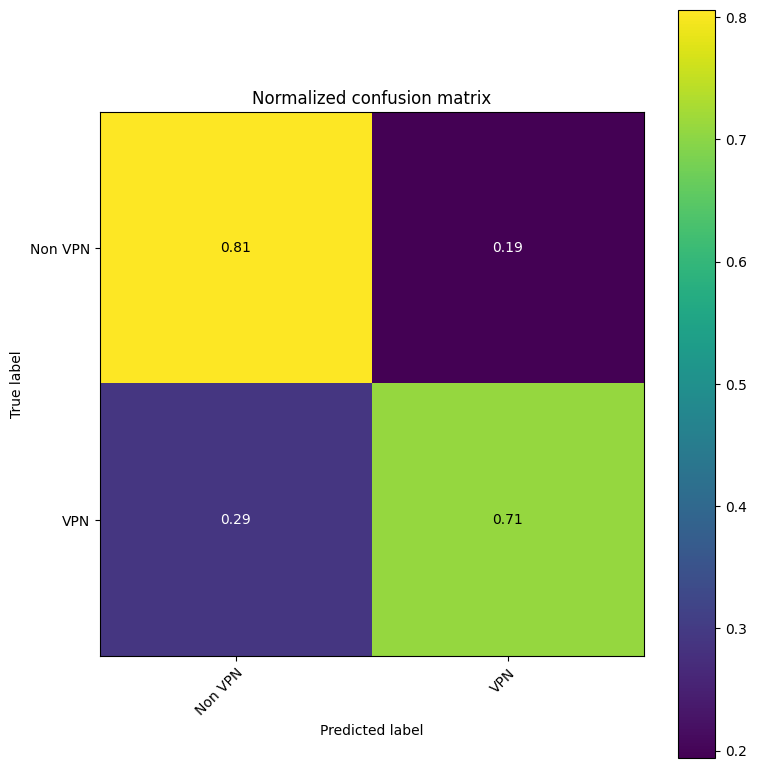

In [ ]:
y_pred = rf_filter.predict(X_test_filter)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)

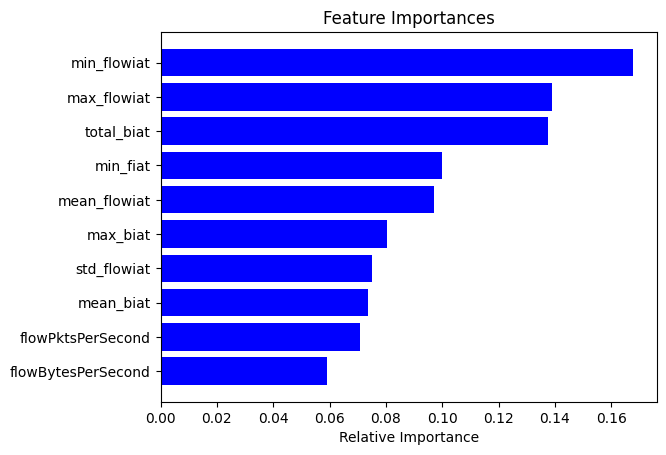

Index(['max_flowiat', 'min_fiat', 'mean_flowiat', 'flowBytesPerSecond',
       'max_biat', 'std_flowiat', 'mean_biat', 'total_biat', 'min_flowiat',
       'flowPktsPerSecond'],
      dtype='object')

In [ ]:
from visualization import plot_conf_mat, plot_feature_importances
feature_names = X_test_filter.columns
plot_feature_importances(rf_filter['RandForest'].feature_importances_, feature_names)
feature_names

## **A1 Random Forest -- Use Radomized CV to get the best parameters**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
param_grid = {
    'RandForest__criterion':['gini', 'entropy'],
    'RandForest__max_features': ['auto'],#[4,6,8,10,12],

    # Number of allowed leafs
    'RandForest__max_leaf_nodes':[16, 32, 64, 128],

    # A node will be split if this split induces a decrease of the
    # impurity greater than or equal to this value.
    'RandForest__min_impurity_decrease' : [0, 0.001, 0.01, 0.1],

    'RandForest__max_depth':[1,10,100,1000,10000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'RandForest__min_weight_fraction_leaf' : [0.1, 0.01, 0.001]

}
search = RandomizedSearchCV(scoring = 'accuracy', # See other possible metrics in
               # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
              estimator=rf,
              param_distributions=param_grid,
              n_iter=20, # We just test 50 configurations
              verbose=2,random_state=42,
              n_jobs=-1, # Triain forests in parallel using
                        # all CPUs
              cv=5 # 5-fold validation
              )
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.

search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['duration',
                                                                                'total_fiat',
                                                                                'total_biat',
                                                                                'min_fiat',
                                                                                'min_biat',
                                                                                'max_fiat',
                                                                                'max_biat',
                                                                                'mean_fiat',
                                                                                'mean_biat',
                                                                                'flowPktsPerSecond',
                                                                                'flowBytesPerSecond',
                                                                                'min_flowiat',
                                                                                'max_flowiat',
                                                                                'mean_flowiat',
                                                                                'std_flowia...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'RandForest__criterion': ['gini',
                                                                  'entropy'],
                                        'RandForest__max_depth': [1, 10, 100,
                                                                  1000, 10000],
                                        'RandForest__max_features': ['auto'],
                                        'RandForest__max_leaf_nodes': [16, 32,
                                                                       64,
                                                                       128],
                                        'RandForest__min_impurity_decrease': [0,
                                                                              0.001,
                                                                              0.01,
                                                                              0.1],
                                        'RandForest__min_weight_fraction_leaf': [0.1,
                                                                                 0.01,
                                                                                 0.001]},
                   random_state=42, scoring='accuracy', verbose=2)

{'RandForest__min_weight_fraction_leaf': 0.001, 'RandForest__min_impurity_decrease': 0.001, 'RandForest__max_leaf_nodes': 64, 'RandForest__max_features': 'auto', 'RandForest__max_depth': 10, 'RandForest__criterion': 'gini'}
Normalized confusion matrix
[[0.85061419 0.14938581]
 [0.22593801 0.77406199]]


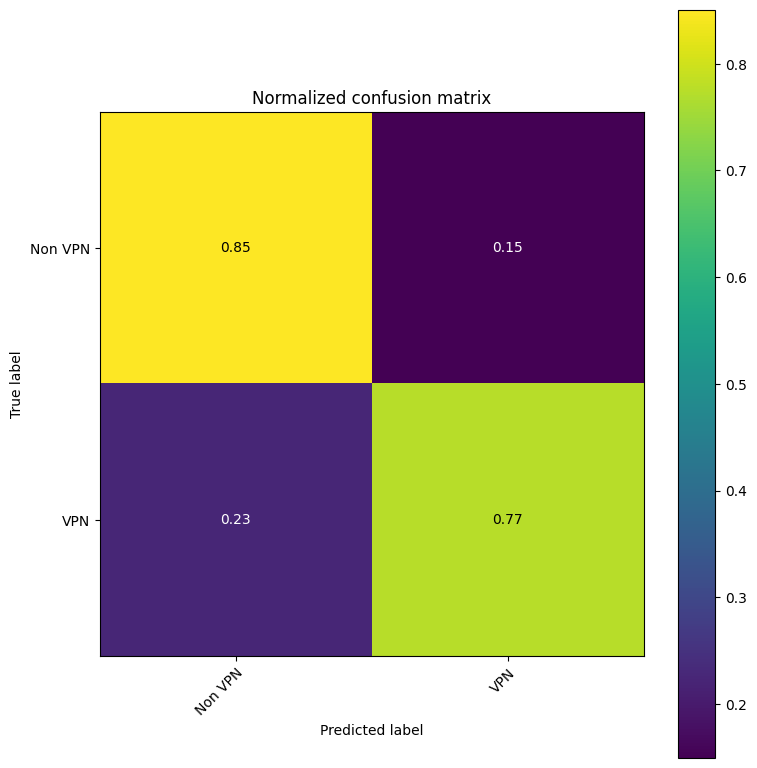

In [ ]:
print(search.best_params_)

model = search.best_estimator_

y_pred = model.predict(X_test)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)

with open(my_path+"RandomForest_A1_Best_v1.pkl", "wb") as dump_file:
  pickle.dump(model, dump_file)

## **A1 KNN Method**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean = False))
])

from sklearn.compose import ColumnTransformer

preprocessing2 = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns_filter)])

knn = Pipeline([
                ('preprocess', preprocessing),
                ('knn', KNeighborsRegressor(n_neighbors=1, weights='uniform',leaf_size = 50))
])

knn_filter = Pipeline([
                ('preprocess', preprocessing2),
                ('knn', KNeighborsRegressor(n_neighbors=1, weights='uniform',))
])
knn.fit(X_train, y_train)

numerical_columns_filter = importances
X_train_filter = X_train[importances]
X_test_filter = X_test[importances]
knn_filter.fit(X_train_filter, y_train)

NameError: ignored

Normalized confusion matrix
[[0.87633965 0.12366035]
 [0.12933577 0.87066423]]
0.8735328842280714


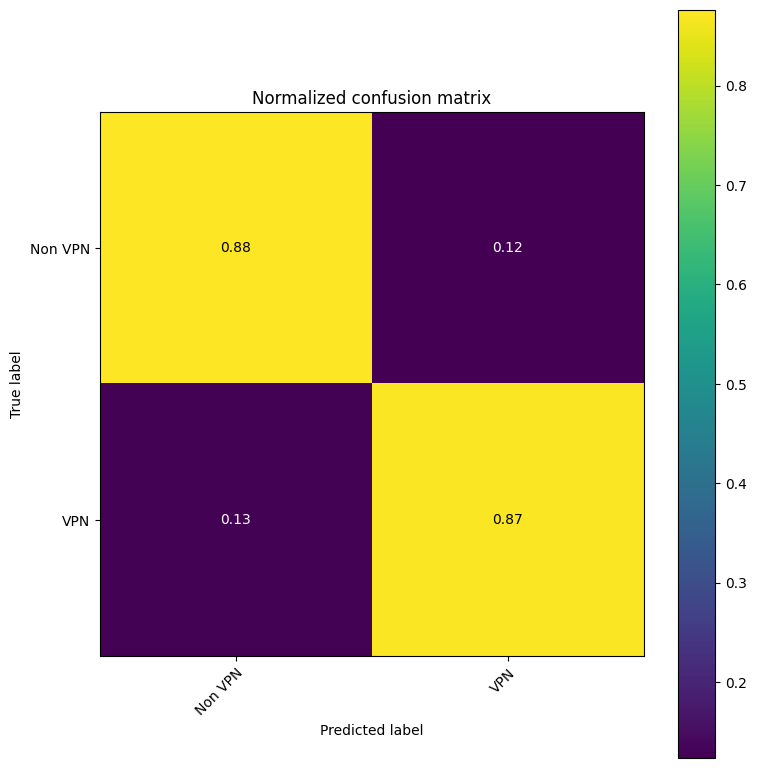

In [ ]:
y_pred = knn.predict(X_test)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)
print(accuracy_score(y_pred, y_test))
with open(my_path+"KNN_A1_v1.pkl", "wb") as dump_file:
  pickle.dump(model, dump_file)

Normalized confusion matrix
[[0.87345425 0.12654575]
 [0.1280719  0.8719281 ]]
0.8726994930203487


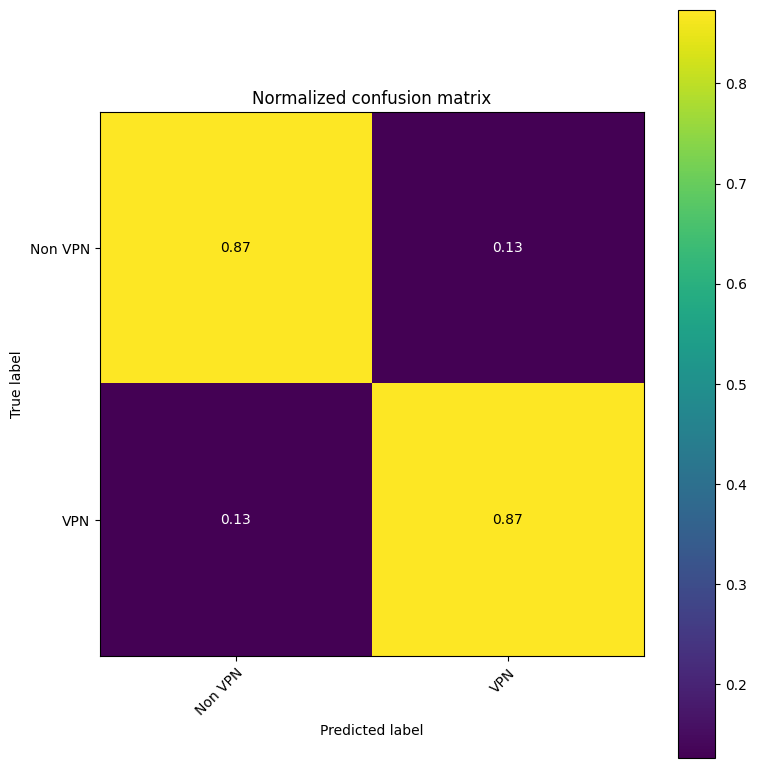

In [ ]:
y_pred = knn_filter.predict(X_test_filter)
y_test = y_test.astype(int)

y_pred = y_pred.astype(int)
class_names = np.array(['Non VPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_names)
print(accuracy_score(y_pred, y_test))
with open(my_path+"KNN_A1_v2.pkl", "wb") as dump_file:
  pickle.dump(model, dump_file)

In [ ]:
parameters = {
        "knn_n_neighbors": range(1, 5),
        "knn_weights": ["uniform", "distance"],
        }
gridsearch = GridSearchCV(knn, parameters)
gridsearch.fit(X_train, y_train)



# **A2 Trainning**

## **A2 Load Data**

In [8]:
## Add A2 Data
dfArffDataAll = pd.DataFrame()
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/'
StrArffFile = os.listdir(sPath)
i = 0
while i < len(StrArffFile):
  StrArffFile[i] = sPath + StrArffFile[i]
  i = i + 1

i = 0
dfArffDataA2 = pd.DataFrame()
while i < len(StrArffFile):
  str = StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1

df.head(n = 20)
print ("Values of class: ",  dfArffDataAll['class1'].unique() )
dfArffDataAll.head(10)
#df.info(verbose=True)

/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-15s-NO-VPN.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-15s-VPN.arff


<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-30s-NO-VPN.arff


<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-30s-VPN.arff


<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-60s-NO-VPN.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-60s-VPN.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-120s-NO-VPN.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/TimeBasedFeatures-Dataset-120s-VPN.arff
Values of class:  [b'BROWSING' b'CHAT' b'FT' b'MAIL' b'P2P' b'STREAMING' b'VOIP'
 b'VPN-BROWSING' b'VPN-CHAT' b'VPN-FT' b'VPN-MAIL' b'VPN-P2P'
 b'VPN-STREAMING' b'VPN-VOIP']


<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-8-722a300c942b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,14993462.0,14993462.0,14967812.0,0.0,0.0,823486.0,854818.0,873.134288,287.914517,4612.743875,...,7050.781273,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
1,14463281.0,14463281.0,14432214.0,0.0,0.0,742368.0,742339.0,1321.330258,312.290951,3952.215268,...,6982.036846,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
2,14997099.0,14997042.0,14997087.0,1.0,0.0,537201.0,565232.0,1850.116210,344.855753,3440.398706,...,5560.260369,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
3,14999980.0,14999919.0,14999956.0,2.0,0.0,954084.0,954052.0,1796.827863,382.837498,3168.737558,...,9375.105249,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
4,14989090.0,14989090.0,14964771.0,2.0,0.0,1014690.0,1016593.0,1668.792029,394.588556,3129.542888,...,9205.461338,9578088.0,9578088.0,9578088.0,0.000000,1014624.0,1014624.0,1014624.0,0.000000,b'BROWSING'
5,14866629.0,14866590.0,14856888.0,3.0,0.0,1399330.0,1211310.0,2669.525947,560.277859,2158.391119,...,15324.408383,1753114.0,2932407.5,3999951.0,976090.773365,1133281.0,1170766.0,1208289.0,31592.045017,b'BROWSING'
6,14997616.0,14997616.0,14971193.0,2.0,0.0,957051.0,757034.0,2881.386359,770.123097,1643.394524,...,8275.684172,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
7,14997816.0,14997768.0,14997765.0,7.0,0.0,316297.0,346578.0,7104.579820,1399.828729,855.257859,...,5399.222140,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
8,14988801.0,14988733.0,14988767.0,7.0,0.0,442870.0,472021.0,7901.282551,1411.238772,835.290294,...,8244.026343,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'BROWSING'
9,14992813.0,14992763.0,14992771.0,7.0,0.0,2894671.0,2923147.0,8950.903284,1658.859372,714.675758,...,28901.017881,14702325.0,14700000.0,14702325.0,0.000000,2894671.0,2894671.0,2894671.0,0.000000,b'BROWSING'


## **A2 Preprocessing Data**

### **Remove NAN & byte string to string**

In [9]:
#remove nan
dfArffDataAll = dfArffDataAll.fillna(0)
#transfer byte arrays to string class
ser = pd.Series(dfArffDataAll['class1']).str.decode('ascii')
dfArffDataAll['class1'] = pd.DataFrame(ser)
#print current class type
dfArffDataAll.columns[dfArffDataAll.isnull().any()].tolist()
class1 =dfArffDataAll['class1'].unique()
print ("Values of class: ",  class1 )
#dfArffDataAll.replace(np.nan,0)

dfArffDataAll['class1'] = dfArffDataAll['class1'].map(lambda x: x.lstrip('VPN-'))
print ("Values of class after delete VPN-: ",  dfArffDataAll['class1'].unique() )

Values of class:  ['BROWSING' 'CHAT' 'FT' 'MAIL' 'P2P' 'STREAMING' 'VOIP' 'VPN-BROWSING'
 'VPN-CHAT' 'VPN-FT' 'VPN-MAIL' 'VPN-P2P' 'VPN-STREAMING' 'VPN-VOIP']
Values of class after delete VPN-:  ['BROWSING' 'CHAT' 'FT' 'MAIL' '2P' 'STREAMING' 'OIP']


### **Remove -1**

In [10]:
#Transform from -1 to zerod
from collections import Counter
handleFeatures = []
def findMinus1Feature(dfArffDataAll,handleFeatures):
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    #print(column," has ",c[-1],"-1 values")
    if c[-1] > 0:
      handleFeatures.append(column)
    c = []

def printMinus1Feature(dfArffDataAll):
  handleFeatures = []
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    if c[-1] > 0:
      print(column," has ",c[-1],"-1 values")
      handleFeatures.append(column)
    c = []
  print("-1 Handle Features",handleFeatures)


In [11]:
printMinus1Feature(dfArffDataAll)
findMinus1Feature(dfArffDataAll,handleFeatures)

print("Handle Features to transform -1 to zero",handleFeatures)

for featureName in handleFeatures:
  dfArffDataAll.loc[dfArffDataAll[featureName] == -1, featureName] = 0

print("After Handle:")
printMinus1Feature(dfArffDataAll)

min_fiat  has  8846 -1 values
min_biat  has  13857 -1 values
max_fiat  has  8846 -1 values
max_biat  has  13857 -1 values
min_flowiat  has  2289 -1 values
max_flowiat  has  2108 -1 values
min_active  has  32228 -1 values
max_active  has  32228 -1 values
min_idle  has  32228 -1 values
max_idle  has  32228 -1 values
-1 Handle Features ['min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
Handle Features to transform -1 to zero ['min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
After Handle:
-1 Handle Features []


In [12]:
column= "duration"
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")
dfArffDataAll.drop(dfArffDataAll[dfArffDataAll.duration == 0].index, inplace=True)
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")

duration  has  2110  0 values
duration  has  0  0 values


<Axes: >

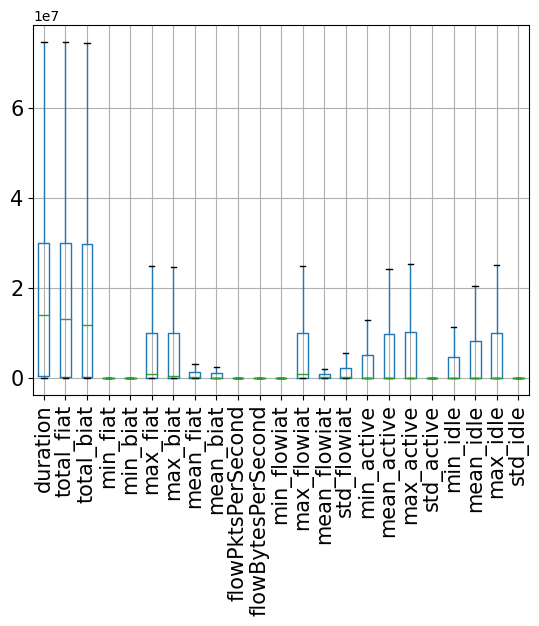

In [6]:
dfArffDataAll.boxplot(rot=90, fontsize=15,showfliers=False)

## **A2 Preprocessing Data**

In [13]:
from imblearn.over_sampling import SMOTE

categorical_columns = ['class1']
remove_feature = [ 'class1']

numerical_columns = list(dfArffDataAll.columns.values)
for name in (remove_feature):
  try:
    numerical_columns.remove(name)
  except:
    print('No '+ name + 'in feature list')
print(numerical_columns)

from sklearn.model_selection import train_test_split
X = dfArffDataAll.drop(columns=remove_feature)
y = dfArffDataAll['class1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

print( "Samples per class before SMOTE: ", Counter(y_train) )
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print( "Samples per class after SMOTE: ", Counter(y_train) )


## Encoder
encoder = []
encoder = OneHotEncoder(sparse_output=False)
#encoder = ce.OneHotEncoder(cols=['class1'], use_cat_names=True)
df_encode = encoder.fit_transform(pd.DataFrame(y))
y_train = encoder.fit_transform(pd.DataFrame(y_train))
y_test = encoder.fit_transform(pd.DataFrame(y_test))

print("Encode in name:%s \n out:%s" %(encoder.feature_names_in_, encoder.get_feature_names_out()))


['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle']
Samples per class before SMOTE:  Counter({'BROWSING': 15041, 'OIP': 8991, 'FT': 5951, '2P': 4840, 'CHAT': 3867, 'MAIL': 2803, 'STREAMING': 1704})
Samples per class after SMOTE:  Counter({'2P': 15041, 'BROWSING': 15041, 'OIP': 15041, 'STREAMING': 15041, 'CHAT': 15041, 'FT': 15041, 'MAIL': 15041})
Encode in name:['class1'] 
 out:['class1_2P' 'class1_BROWSING' 'class1_CHAT' 'class1_FT' 'class1_MAIL'
 'class1_OIP' 'class1_STREAMING']


In [ ]:
X.head(1000)

## **A2 Tranning Model KNN**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns)])

from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
knn = Pipeline([
                ('preprocess', preprocessing),
                ('knn', KNeighborsRegressor(n_neighbors=1,weights="uniform"))
])



In [16]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_fiat',
                                                   'total_biat', 'min_fiat',
                                                   'min_biat', 'max_fiat',
                                                   'max_biat', 'mean_fiat',
                                                   'mean_biat',
                                                   'flowPktsPerSecond',
                                                   'flowBytesPerSecond',
                                                   'min_flowiat', 'max_flowiat',
                                                   'mean_flowiat',
                                                   'std_flowiat', 'min_active',
                                                   'mean_active', 'max_active',
                                                   'std_active', 'min_idle',
                                                   'mean_idle', 'max_idle',
                                                   'std_idle'])])),
                ('knn', KNeighborsRegressor(n_neighbors=1))])

## **A2 Outcome Analysis**

0.8895756649767345
Normalized confusion matrix
[[9.47336191e-01 1.28597673e-02 1.77587263e-02 1.34721372e-02
  0.00000000e+00 4.89895897e-03 3.67421923e-03]
 [5.46448087e-03 8.82614855e-01 5.95021251e-02 2.97510625e-02
  8.70269176e-03 5.86925724e-03 8.09552722e-03]
 [2.13740458e-02 1.36641221e-01 7.58015267e-01 5.19083969e-02
  2.44274809e-02 5.34351145e-03 2.29007634e-03]
 [2.43417784e-02 6.65673125e-02 5.16641828e-02 8.17188276e-01
  2.23546945e-02 7.45156483e-03 1.04321908e-02]
 [3.20512821e-03 2.24358974e-02 2.35042735e-02 2.45726496e-02
  9.18803419e-01 2.13675214e-03 5.34188034e-03]
 [9.35203741e-03 8.68403474e-03 5.34402138e-03 7.01402806e-03
  3.34001336e-04 9.67601870e-01 1.67000668e-03]
 [1.22377622e-02 5.06993007e-02 2.27272727e-02 2.09790210e-02
  6.99300699e-03 1.74825175e-03 8.84615385e-01]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

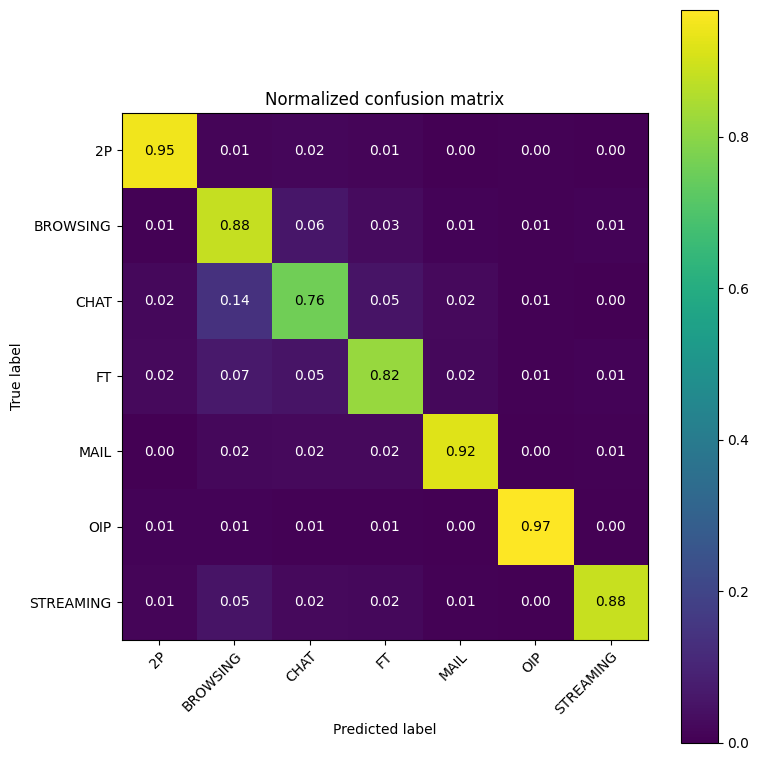

In [17]:
y_pred = knn.predict(X_test)
y_test_out = y_test
#y_test_out = y_test.astype(int)
#y_test_out = np.array(y_test)

y_pred = np.array(encoder.inverse_transform(y_pred))
y_test_out = np.array(encoder.inverse_transform(y_test_out))
#print(y_pred)
#print(y_test_out)

from sklearn import preprocessing
labelEncoder = []
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(y_pred)
y_pred = labelEncoder.transform(y_pred)
y_test_out = labelEncoder.transform(y_test_out)


#y_pred = y_pred.astype(int)
class_names = np.array(labelEncoder.classes_)
print(accuracy_score(y_pred, y_test_out))
plot_conf_mat(y_test_out, y_pred, class_names)

#with open(my_path+"KNN_A1_v1.pkl", "wb") as dump_file:
 # pickle.dump(model, dump_file)

In [18]:
knn['knn'].predict

<bound method KNeighborsRegressor.predict of KNeighborsRegressor(n_neighbors=1)>

In [52]:
X_test.iloc[0:100]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
52301,82.0,82.0,0.0,82.0,0.0,82.0,0.0,8.200000e+01,0.000000e+00,24390.243902,...,8.200000e+01,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
19187,29979976.0,29979934.0,29180500.0,318.0,7.0,7211370.0,7155615.0,4.835473e+05,2.582345e+05,5.903941,...,1.703408e+05,8.685506e+05,1699712.0,4.149633e+06,8277300.0,2.893750e+06,1590158.0,3.758128e+06,7155615.0,2.490262e+06
38816,1572967.0,1518432.0,1520167.0,746.0,338.0,617326.0,617099.0,8.435733e+04,7.600835e+04,25.429650,...,4.033249e+04,1.000099e+05,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
1583,13699036.0,13672742.0,13699036.0,365.0,18.0,7243048.0,7243141.0,9.766244e+05,4.723806e+05,3.284903,...,3.113417e+05,1.196798e+06,2702851.0,4.535785e+06,7316555.0,2.448543e+06,2551841.0,4.114046e+06,7217243.0,2.687468e+06
42181,59603443.0,59577998.0,59578108.0,13.0,12.0,16343890.0,16279003.0,5.568037e+05,4.025548e+05,4.311831,...,2.328259e+05,1.600223e+06,2138962.0,8.355812e+06,16614969.0,6.041389e+06,1272749.0,7.728045e+06,16279003.0,6.424425e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,13885853.0,13783417.0,13885853.0,3.0,21.0,12737788.0,12800508.0,2.996395e+05,3.306155e+05,6.481417,...,1.560208e+05,1.349551e+06,12775028.0,1.280000e+07,12775028.0,0.000000e+00,12737788.0,1.270000e+07,12737788.0,0.000000e+00
19697,29958787.0,29933496.0,29933492.0,3.0,12.0,6429158.0,6428908.0,3.695493e+05,3.054438e+05,6.041633,...,1.664377e+05,7.400711e+05,1715675.0,3.677238e+06,6578458.0,1.683824e+06,1504134.0,3.191469e+06,6403540.0,1.694536e+06
28870,26763057.0,26763057.0,26562166.0,39647.0,527.0,6350872.0,6351405.0,1.338153e+06,1.328108e+06,1.569327,...,6.527575e+05,1.332376e+06,2222970.0,4.321467e+06,7303364.0,1.849028e+06,1155160.0,3.457692e+06,6150053.0,1.682531e+06
23763,3317411.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.602880,...,3.317411e+06,0.000000e+00,3317411.0,3.317411e+06,3317411.0,0.000000e+00,3317411.0,3.317411e+06,3317411.0,0.000000e+00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.8 MB/s eta 0:00:00


PermutationExplainer explainer: 101it [50:26, 30.26s/it]


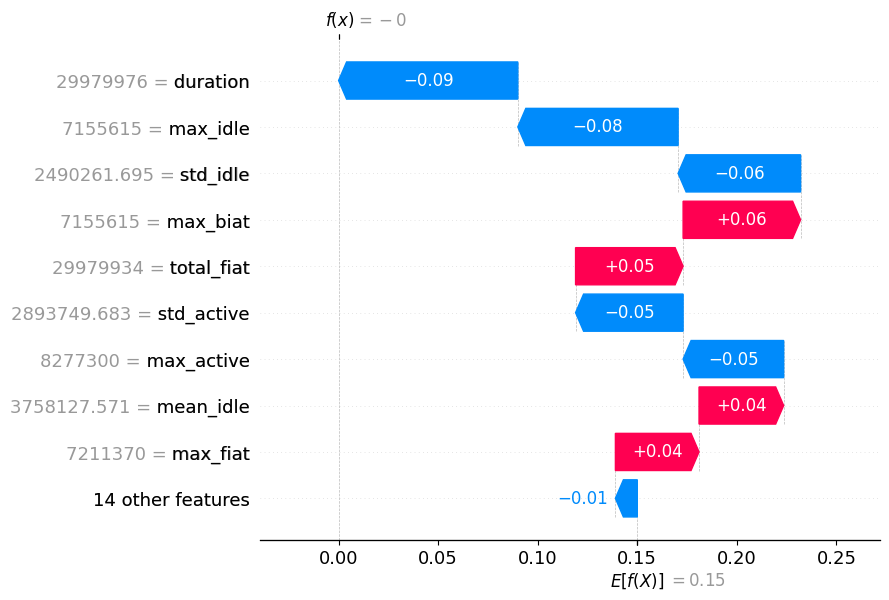

In [19]:
!pip install -q shap
import shap
X_sub = shap.sample(X_train, 100)
ex = shap.Explainer(knn.predict, X_sub)
X_train
#shap_values = ex(X_train.iloc[0:100])
shap_values = ex(X_test.iloc[0:100])

class_index = 1
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

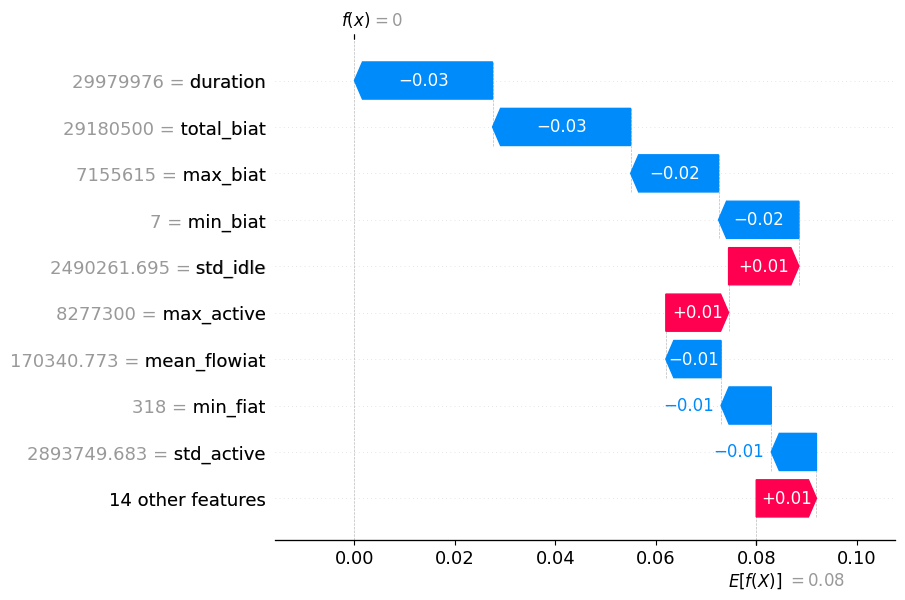

In [47]:
class_index = 0
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

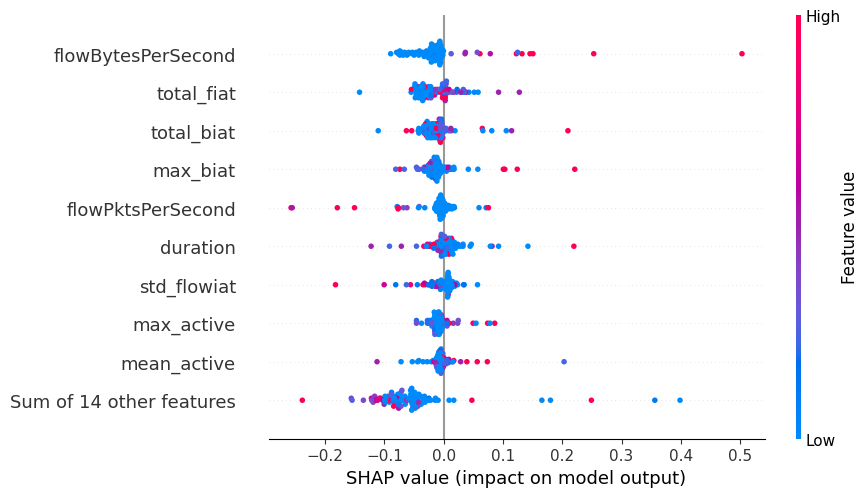

In [53]:
class_index = 6
shap.plots.beeswarm(shap_values[:,:,class_index])

In [46]:
shap.initjs()
shap.plots.force(shap_values[data_index,:,class_index])

In [25]:
shap_values

.values =
array([[[ 1.20000000e-02,  2.85000000e-02,  4.00000000e-03, ...,
          5.25000000e-02, -6.00000000e-02,  8.00000000e-03],
        [-7.50000000e-03,  3.20000000e-02, -1.95000000e-02, ...,
          3.05000000e-02, -2.75000000e-02, -3.55000000e-02],
        [ 2.65000000e-02,  3.15000000e-02, -2.90000000e-02, ...,
          6.35000000e-02,  2.00000000e-02, -2.75000000e-02],
        ...,
        [ 8.50000000e-03, -7.50000000e-03, -3.50000000e-03, ...,
          2.00000000e-03,  3.00000000e-03, -7.50000000e-03],
        [ 3.50000000e-03, -1.05000000e-02, -1.30000000e-02, ...,
          1.25000000e-02,  9.00000000e-03, -9.50000000e-03],
        [-1.50000000e-03, -9.50000000e-03, -1.55000000e-02, ...,
          1.35000000e-02,  7.50000000e-03,  6.00000000e-03]],

       [[-2.75000000e-02, -9.00000000e-02, -5.00000000e-04, ...,
         -2.10000000e-02,  4.45000000e-02,  5.50000000e-03],
        [ 6.50000000e-03,  5.40000000e-02,  6.15000000e-02, ...,
         -1.00000000e-02,  5

## **A2 Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean = False))
])

from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns)])

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100,
                      criterion='gini',
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto', # auto means=sqrt(n_features)
                      min_weight_fraction_leaf=0.0,
                      )

rf = Pipeline([ ('preprocess', preprocessing),
              ('RandForest', model) ])

In [ ]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['duration', 'total_fiat',
                                                   'total_biat', 'min_fiat',
                                                   'min_biat', 'max_fiat',
                                                   'max_biat', 'mean_fiat',
                                                   'mean_biat',
                                                   'flowPktsPerSecond',
                                                   'flowBytesPerSecond',
                                                   'min_flowiat', 'max_flowiat',
                                                   'mean_flowiat',
                                                   'std_flowiat', 'min_active',
                                                   'mean_active', 'max_active',
                                                   'std_active', 'min_idle',
                                                   'mean_idle', 'max_idle',
                                                   'std_idle', 'std_fiat',
                                                   'std_biat'])])),
                ('RandForest',
                 RandomForestClassifier(max_features='auto', max_leaf_nodes=16,
                                        n_jobs=-1, random_state=5))])

In [ ]:
import pickle # To save the model
with open(my_path+"RandomForest_A2_v1.pkl", "wb") as dump_file:
  pickle.dump(rf, dump_file)

In [ ]:
y_pred = rf.predict(X_test)
y_test_out = y_test
#y_test_out = y_test.astype(int)
#y_test_out = np.array(y_test)

y_pred = np.array(encoder.inverse_transform(y_pred))
y_test_out = np.array(encoder.inverse_transform(y_test_out))
#print(y_pred)
#print(y_test_out)

from sklearn import preprocessing
labelEncoder = []
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(y_pred)
y_pred = labelEncoder.transform(y_pred)
y_test_out = labelEncoder.transform(y_test_out)


#y_pred = y_pred.astype(int)
class_names = np.array(labelEncoder.classes_)
print(accuracy_score(y_pred, y_test_out))
plot_conf_mat(y_test_out, y_pred, class_names)

#with open(my_path+"KNN_A1_v1.pkl", "wb") as dump_file:
 # pickle.dump(model, dump_file)

NameError: ignored

# **B Trainning**

## **B Load Data**

In [ ]:
## Add B Data
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/'
StrArffFile = os.listdir(sPath)
dfArffDataAll = pd.DataFrame()
i = 0
while i < len(StrArffFile):
  #if 'TimeBasedFeatures-Dataset-60s.arff' == StrArffFile[i] or "TimeBasedFeatures-Dataset-60s-AllinOne.arff" == StrArffFile[i]:
  #  StrArffFile.pop(i)
  #  continue
  StrArffFile[i] = sPath + StrArffFile[i]
  i = i + 1

i = 0
while i < len(StrArffFile):
  str = StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1

#df.head(n = 5)
#df.info(verbose=True)

/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-15s.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-15s-AllinOne.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-30s.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-30s-AllinOne.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-120s.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-120s-AllinOne.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-60s.arff
/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/TimeBasedFeatures-Dataset-60s-AllinOne.arff


<ipython-input-214-f2b95e956909>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-214-f2b95e956909>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-214-f2b95e956909>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)
<ipython-input-214-f2b95e956909>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


In [ ]:
dfArffDataAll.boxplot(rot=90, fontsize=15,showfliers=False)

### **Remove NAN & byte string to string**

In [ ]:
#remove nan
dfArffDataAll = dfArffDataAll.fillna(0)
#transfer byte arrays to string class
ser = pd.Series(dfArffDataAll['class1']).str.decode('ascii')
dfArffDataAll['class1'] = pd.DataFrame(ser)
#print current class type
dfArffDataAll.columns[dfArffDataAll.isnull().any()].tolist()
class1 =dfArffDataAll['class1'].unique()
print ("Values of class: ",  class1 )
#dfArffDataAll.replace(np.nan,0)


Values of class:  ['CHAT' 'FT' 'MAIL' 'STREAMING' 'VOIP' 'VPN-CHAT' 'VPN-P2P' 'VPN-FT'
 'VPN-MAIL' 'VPN-STREAMING' 'VPN-VOIP' 'BROWSING' 'VPN-BROWSING' 'P2P']


### **Remove -1**

In [ ]:
#Transform from -1 to zerod
from collections import Counter
handleFeatures = []
def findMinus1Feature(dfArffDataAll,handleFeatures):
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    #print(column," has ",c[-1],"-1 values")
    if c[-1] > 0:
      handleFeatures.append(column)
    c = []

def printMinus1Feature(dfArffDataAll):
  handleFeatures = []
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    if c[-1] > 0:
      print(column," has ",c[-1],"-1 values")
      handleFeatures.append(column)
    c = []
  print("-1 Handle Features",handleFeatures)


In [ ]:
printMinus1Feature(dfArffDataAll)
findMinus1Feature(dfArffDataAll,handleFeatures)

print("Handle Features to transform -1 to zero",handleFeatures)

for featureName in handleFeatures:
  dfArffDataAll.loc[dfArffDataAll[featureName] == -1, featureName] = 0

print("After Handle:")
printMinus1Feature(dfArffDataAll)

total_fiat  has  12890 -1 values
total_biat  has  19430 -1 values
min_fiat  has  17692 -1 values
min_biat  has  27714 -1 values
max_fiat  has  4802 -1 values
max_biat  has  8284 -1 values
min_flowiat  has  4578 -1 values
max_flowiat  has  4216 -1 values
min_active  has  64456 -1 values
max_active  has  64456 -1 values
min_idle  has  64456 -1 values
max_idle  has  64456 -1 values
-1 Handle Features ['total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
Handle Features to transform -1 to zero ['total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']
After Handle:
-1 Handle Features []


In [ ]:
column= "duration"
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")
dfArffDataAll.drop(dfArffDataAll[dfArffDataAll.duration == 0].index, inplace=True)
c = Counter(dfArffDataAll[column])
print(column," has ",c[0]," 0 values")

duration  has  4220  0 values
duration  has  0  0 values


<Axes: >

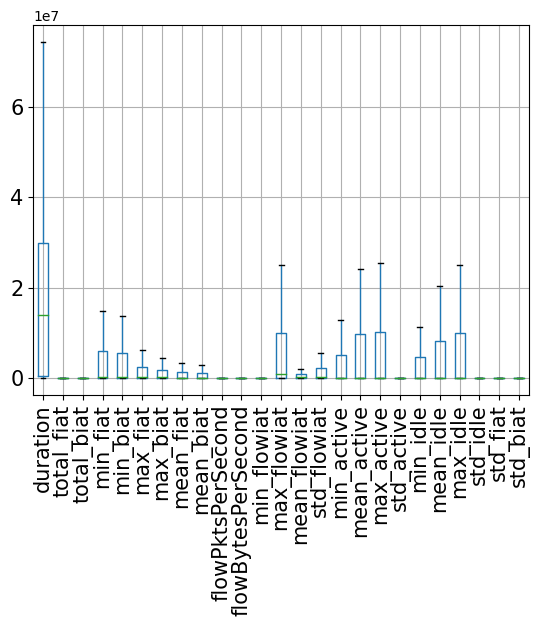

In [ ]:
dfArffDataAll.boxplot(rot=90, fontsize=15,showfliers=False)

In [ ]:
dfArffDataAll.head(1000)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1,std_fiat,std_biat
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT,0.0,0.0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT,0.0,0.0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT,0.0,0.0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT,0.0,0.0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1166.0,143.0,960.0,400.0,960.0,271.500000,960.000000,181.723691,0.000000,4288.164666,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,FT,0.0,0.0
1045,1368882.0,12.0,40.0,461462.0,360632.0,6549.674641,10904.347107,46664.322581,52300.726229,242.533688,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,FT,0.0,0.0
1046,1050.0,140.0,897.0,337.0,897.0,238.500000,897.000000,139.296446,0.000000,4761.904762,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,FT,0.0,0.0
1047,1101.0,146.0,916.0,374.0,916.0,260.000000,916.000000,161.217245,0.000000,4541.326067,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,FT,0.0,0.0


## **B Preprocessing Data**

In [ ]:
print ("Values of class: ",  dfArffDataAll['class1'].unique() )

Values of class:  ['CHAT' 'FT' 'MAIL' 'STREAMING' 'VOIP' 'VPN-CHAT' 'VPN-P2P' 'VPN-FT'
 'VPN-MAIL' 'VPN-STREAMING' 'VPN-VOIP' 'BROWSING' 'VPN-BROWSING' 'P2P']


In [ ]:
from collections import Counter

dfArffDataAll = dfArffDataAll.fillna(0)
ser = pd.Series(dfArffDataAll['class1']).str.decode('ascii')
dfArffDataAll['class1'] = pd.DataFrame(ser)


print ("Values of class: ",  dfArffDataAll['class1'].unique() )

print( "Samples per class after SMOTE: ", Counter(dfArffDataAll['class1']) )

Values of class:  [nan]
Samples per class after SMOTE:  Counter({nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [ ]:
from imblearn.over_sampling import SMOTE

categorical_columns = ['class1']
remove_feature = [ 'class1']

numerical_columns = list(dfArffDataAll.columns.values)
for name in (remove_feature):
  try:
    numerical_columns.remove(name)
  except:
    print('No '+ name + 'in feature list')
print(numerical_columns)

from sklearn.model_selection import train_test_split
X = dfArffDataAll.drop(columns=remove_feature)
y = dfArffDataAll['class1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print( "Samples per class after SMOTE: ", Counter(y_train) )


## Encoder
encoder = []
encoder = OneHotEncoder(sparse_output=False)
#encoder = ce.OneHotEncoder(cols=['class1'], use_cat_names=True)
df_encode = encoder.fit_transform(pd.DataFrame(y))
y_train = encoder.fit_transform(pd.DataFrame(y_train))
y_test = encoder.fit_transform(pd.DataFrame(y_test))

print("Encode in name:%s \n out:%s" %(encoder.feature_names_in_, encoder.get_feature_names_out()))

['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'std_fiat', 'std_biat']
Samples per class after SMOTE:  Counter({'VPN-MAIL': 22527, 'STREAMING': 22527, 'BROWSING': 22527, 'MAIL': 22527, 'VPN-BROWSING': 22527, 'CHAT': 22527, 'VOIP': 22527, 'P2P': 22527, 'FT': 22527, 'VPN-CHAT': 22527, 'VPN-P2P': 22527, 'VPN-FT': 22527, 'VPN-VOIP': 22527, 'VPN-STREAMING': 22527})
Encode in name:['class1'] 
 out:['class1_BROWSING' 'class1_CHAT' 'class1_FT' 'class1_MAIL' 'class1_P2P'
 'class1_STREAMING' 'class1_VOIP' 'class1_VPN-BROWSING' 'class1_VPN-CHAT'
 'class1_VPN-FT' 'class1_VPN-MAIL' 'class1_VPN-P2P' 'class1_VPN-STREAMING'
 'class1_VPN-VOIP']


In [ ]:
X.head(10)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,std_fiat,std_biat
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,1.610965e+05,0.0,0.0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,2.731384e+05,0.0,0.0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000e+00,0.0,0.0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,7.749303e+05,0.0,0.0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,7.259878e+05,0.0,0.0
5,11771793.0,30.0,6.0,3149632.0,2964504.0,244008.020833,255167.347826,632857.385277,607541.355370,8.155087,...,1443143.0,2.872733e+06,3563174.0,9.651035e+05,1065834.0,1933295.0,2964504.0,1.008645e+06,0.0,0.0
6,13978645.0,17.0,7.0,2249885.0,2064514.0,215483.375000,254157.181818,484527.921325,462592.986971,8.656061,...,1363299.0,2.254176e+06,3870047.0,1.010714e+06,1147658.0,1533121.8,2064514.0,4.218329e+05,0.0,0.0
7,13942087.0,22.0,6.0,2426308.0,2425956.0,231527.716667,248101.035714,516661.130191,507941.688525,8.463582,...,2076878.0,2.741697e+06,4001564.0,7.721215e+05,1252392.0,1719479.4,2375478.0,4.301720e+05,0.0,0.0
8,7863522.0,30.0,8.0,2067690.0,2068091.0,244213.125000,252051.483871,571806.194575,562812.286699,8.266016,...,2092947.0,2.535199e+06,3282729.0,6.509928e+05,1707343.0,1897912.0,2017289.0,1.667869e+05,0.0,0.0
9,8259704.0,18.0,9.0,2321059.0,2278426.0,269051.300000,330388.160000,639533.232126,637243.988848,6.900974,...,2368851.0,2.687726e+06,3162320.0,4.190281e+05,1702783.0,1980072.0,2270116.0,2.838815e+05,0.0,0.0


## **B KNN Trannibg Model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('num', numerical_pipe, numerical_columns)])

from sklearn.neighbors import KNeighborsRegressor
knn = Pipeline([
                ('preprocess', preprocessing),
                ('knn', KNeighborsRegressor(n_neighbors=3,weights="uniform"))
])



In [ ]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_fiat',
                                                   'total_biat', 'min_fiat',
                                                   'min_biat', 'max_fiat',
                                                   'max_biat', 'mean_fiat',
                                                   'mean_biat',
                                                   'flowPktsPerSecond',
                                                   'flowBytesPerSecond',
                                                   'min_flowiat', 'max_flowiat',
                                                   'mean_flowiat',
                                                   'std_flowiat', 'min_active',
                                                   'mean_active', 'max_active',
                                                   'std_active', 'min_idle',
                                                   'mean_idle', 'max_idle',
                                                   'std_idle', 'std_fiat',
                                                   'std_biat'])])),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

## **B Outcome Analysis**

In [ ]:
y_pred = knn.predict(X_test)
y_test_out = y_test
#y_test_out = y_test.astype(int)
#y_test_out = np.array(y_test)

y_pred = np.array(encoder.inverse_transform(y_pred))
y_test_out = np.array(encoder.inverse_transform(y_test_out))
#print(y_pred)
#print(y_test_out)

from sklearn import preprocessing
labelEncoder = []
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(y_pred)
y_pred = labelEncoder.transform(y_pred)
y_test_out = labelEncoder.transform(y_test_out)


#y_pred = y_pred.astype(int)
class_names = np.array(labelEncoder.classes_)
print(accuracy_score(y_pred, y_test_out))
plot_conf_mat(y_test_out, y_pred, class_names)

#with open(my_path+"KNN_A1_v1.pkl", "wb") as dump_file:
 # pickle.dump(model, dump_file)